In [2]:
from sklearn.datasets import fetch_openml

In [3]:
data = fetch_openml("mnist_784", version=1, as_frame=False)

In [6]:
X = data.data
y = data.target

(-0.5, 27.5, 27.5, -0.5)

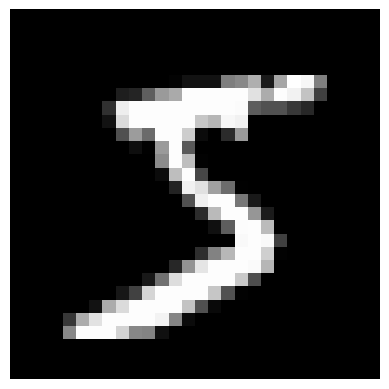

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.axis("off")

In [9]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
X_train.shape

(60000, 784)

In [15]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_class = SGDClassifier(random_state=42)
sgd_class.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_class.predict([X[0]])

array([ True])

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_train_pred = sgd_class.predict(X_train)
accuracy_score(y_train_5, y_train_pred)

0.9522666666666667

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_class, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_class, X_train, y_train_5, cv=3, method='decision_function')

In [23]:
y_train_pred[y_train_5].mean(), y_train_pred[~y_train_5].mean()

(3344.312764449695, -20198.828171089554)

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_5, y_train_pred)

In [27]:
precision.shape, threshold.shape

((60001,), (60000,))

In [ ]:
precision>0.9, precision[precision>0.9], recall[precision>0.9]

(array([False, False, False, ...,  True,  True,  True]),
 array([0.90003459, 0.90024247, 0.9002079 , ..., 1.        , 1.        ,
        1.        ]),
 array([4.79985243e-01, 4.79431839e-01, 4.79247371e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]))

: 

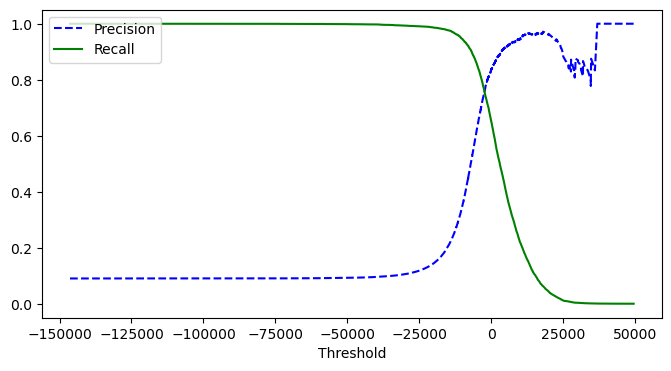

In [29]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 4))
plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')